In [1]:
sys.path.insert(0, './common')

import seaborn as sns
import qlearning_target_model
import a2c_model
import ppo_model
import plot
import matplotlib.pyplot as plt

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

qlearning = qlearning_target_model.QLearning(127, 2, 512)
qlearning1 = qlearning_target_model.QLearning(127, 2, 512)
a2c = a2c_model.A2C(127, 2, 1024)
ppo = ppo_model.PPO(126, 2, 256)
ppo1 = ppo_model.PPO(126, 2, 512)
ppo2 = ppo_model.PPO(127, 2, 512)

In [23]:
save_path = './results/collectible/QLEARNING-TARGET-512-no-decay'
qlearning.set_model_save_path(save_path)
qlearning.load_model()
save_path = './results/collectible/BEST_QLEARNING-TARGET-512-else-defaults-decay'
qlearning1.set_model_save_path(save_path)
qlearning1.load_model()

Model loaded
Training history loaded
Model loaded
Training history loaded


In [9]:
save_path = './results/collectible/BEST-A2C'
a2c.set_model_save_path(save_path)
a2c.load_model()

Training history loaded
Model loaded


In [3]:
save_path = './results/test/no_x_256_10_0.2_64'
ppo.set_model_save_path(save_path)
ppo.load_model()

Model loaded
Training history loaded


In [5]:
save_path = './results/test/no_x_512_10_0.2_64_BEST'
ppo1.set_model_save_path(save_path)
ppo1.load_model()

Model loaded
Training history loaded


In [6]:
save_path = './results/test/with_x_512_10_0.2_64'
ppo2.set_model_save_path(save_path)
ppo2.load_model()

Model loaded
Training history loaded


In [13]:
SMOOTH_COUNT = 100
# qlearning_smoothed_rewards = plot.smooth_values(qlearning.train_rewards, SMOOTH_COUNT)
# qlearning_smoothed_rewards1 = plot.smooth_values(qlearning1.train_rewards, SMOOTH_COUNT)
# a2c_smoothed_rewards = plot.smooth_values(a2c.train_rewards, SMOOTH_COUNT)
ppo_smoothed_rewards = plot.smooth_values(a2c.train_rewards, SMOOTH_COUNT)
ppo_smoothed_rewards1 = plot.smooth_values(ppo1.train_rewards, SMOOTH_COUNT)
ppo_smoothed_rewards2 = plot.smooth_values(ppo2.train_rewards, SMOOTH_COUNT)

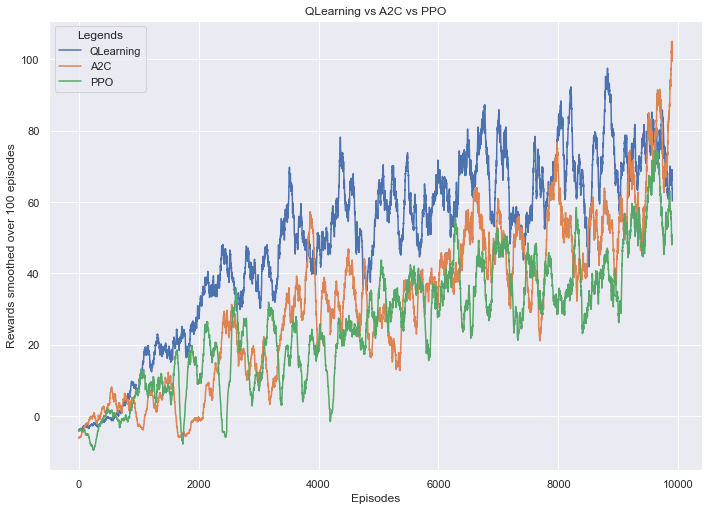

In [14]:
ax = sns.lineplot(data=[ppo_smoothed_rewards, ppo_smoothed_rewards1, ppo_smoothed_rewards2])
ax.lines[1].set_linestyle('-')
ax.lines[2].set_linestyle('-')
ax.lines[3].set_linestyle('-')
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards smoothed over 100 episodes')
plt.title('QLearning vs A2C vs PPO')
plt.legend(labels=["QLearning", "A2C", 'PPO'], title = "Legends")
plt.show()